In [1]:
# Aineistona on sosiaalisen median data 1.1.2020-30.4.2021 hauilla ruoanlaitto* OR kotiruoka* OR "laittaa # ruokaa" OR "ruoan laitto*" OR "ruuan laitto*" OR arkiruoka*

# Tavoitteena on löytää mahdollisia kuluttajatottumusten muutoksia ennen koronaa ja koronan aikana     
# ruoanlaitossa sosiaalisen median kanavissa. 
# Sentimentin kehitys: minkälaiset teemat sävyttävät kielteisesti ja myönteisesti nopeasti liikkuvissa kulutustavaroissa? 
# Avaintuloksia voi ristiintaulukoida alueellisesti maakunnittain ja ajanjaksolla ennen koronaa ja sen aikana. 
# Ristiintaulukointi sentimentti vs. asuinmaakunta tehtävissä.
# Tekstipilvet Sentence-sarakkeesta.
# Tekstipilvet Keywords = sanat, jotka haetuista sanoista ovat löytyneet kyseisestä osumasta
# Tekstipilvet Key Phrases = poimii substantiivit, nimet ja käsitteet
# Engagement (reaktioiden määrä some-julkaisuissa)
# Social Echo (artikkelin jakokerrat somessa, sekä tykkäykset Facebook/Twitter/Reddit)
# Kanavat (onko keskustelu vaihtunut ajan myötä muihin lähteisiin)

# tuodaan kirjastoja sisään

import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline

# Tuodaan data sisään

df = pd.read_excel("kotiruoka 12052021.xlsx")
df.head()

,Date,Headline,Sentence,Source,Influencer,Country,Subregion,Language,Reach,Desktop_Reach,...,Facebook_Social_Echo,Reddit_Social_Echo,Engagement,Sentiment,Key_Phrases,Keywords,Twitter_Authority,Twitter_Followers,State,City
0,2020-01-01,NaN,RT @apanaani: Kuulkaas jos olisi semmoinen rav...,Twitter,@diskolento,Finland,NaN,Finnish,82,0,...,NaN,NaN,NaN,Neutral,"Tyyliin reilun,hernepihvi jollain kastikkeella...",kotiruokaa,3.0,82.0,Uusimaa,Helsinki
1,2020-01-01,NaN,Kuulkaas jos olisi semmoinen ravintola josta s...,Twitter,@apanaani,Finland,NaN,Finnish,683,0,...,NaN,NaN,19.0,Negative,"Tyyliin reilun,hernepihvi jollain kastikkeella...",kotiruokaa,5.0,683.0,Uusimaa,Helsinki
2,2020-01-01,HELPPO PASTA BOLOGNESE (Spaghetti Bolognese),valmistaa 3 annosta Kaikki voivat tehdä spaghe...,Youtube,RUOKA RESEPTEJÄ,Unknown,NaN,unknown,61,0,...,NaN,NaN,NaN,Not Rated,NaN,Ruoanlaitto,NaN,NaN,NaN,NaN
3,2020-01-01,Autottoman perheen joulu ei sujunut täysin aut...,Tarkoituksena oli viettää mahdollisimman stre...,Blogs,Noora Inkeroinen,Finland,NaN,Finnish,0,0,...,NaN,NaN,NaN,Positive,"joulu,Autottoman perheen joulu,Hotellin poniaj...",ruoanlaittoa,NaN,NaN,NaN,NaN
4,2020-01-01,Vuoden 2019 parhaimmat ja huonoimmat!,arjen helpottaja: Ruokaboksi\n\nPeruste: Meill...,Blogs,meemilaa,Unknown,NaN,Finnish,0,0,...,NaN,NaN,NaN,Neutral,"caption id,Terve vauva,10min vauvan syntymän,a...",ruoanlaitto,NaN,NaN,NaN,NaN


In [2]:
# Muuttajatyyppien tarkastelua

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36142 entries, 0 to 36141
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  36142 non-null  datetime64[ns]
 1   Headline              14113 non-null  object        
 2   Sentence              33654 non-null  object        
 3   Source                36137 non-null  object        
 4   Influencer            34486 non-null  object        
 5   Country               36142 non-null  object        
 6   Subregion             2492 non-null   object        
 7   Language              36142 non-null  object        
 8   Reach                 36142 non-null  int64         
 9   Desktop_Reach         36142 non-null  int64         
 10  Mobile_Reach          36142 non-null  int64         
 11  Twitter_Social_Echo   4037 non-null   float64       
 12  Facebook_Social_Echo  4037 non-null   float64       
 13  Reddit_Social_Ec

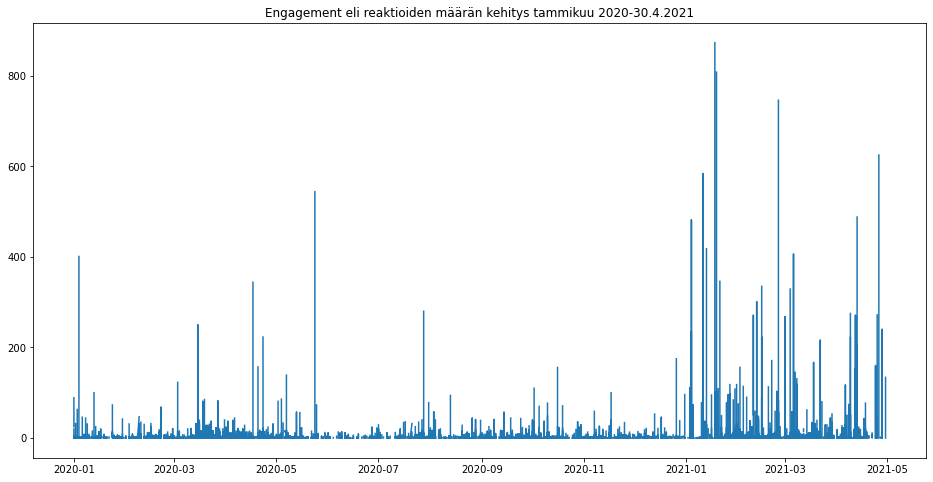

In [3]:
# Engagement-reaktioiden tarkastelua koronapandemian aikana

df["Date"] = pd.to_datetime(df.Date, format="%Y-%m-%d")
df.index=df['Date']
plt.figure(figsize=(16,8))
plt.title("Engagement eli reaktioiden määrän kehitys tammikuu 2020-30.4.2021")
plt.plot(df['Engagement'],label='Engagement')

In [4]:
# Tuodaan lisää kirjastoja sisään

import csv
import nltk
import string
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
import re
import sklearn
import os
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

import pickle
import re
from collections import Counter
from string import punctuation
import tweepy
from tweepy import OAuthHandler
import json
from wordcloud import WordCloud

import plotly
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline()

from IPython.display import IFrame
import folium
from folium import plugins
from folium.plugins import MarkerCluster, FastMarkerCluster, HeatMapWithTime

pd.set_option('display.max_colwidth', -1)
plt.style.use('seaborn-white')

from collections import Counter

<ipython-input-4-ecef94e3cfa5>:53: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



In [5]:
# dropataan tyhjiä rivejä pois

df = df.dropna(subset = ['Sentence'])

In [6]:
# tarkastellaan dataa

tweet_tokenizer = TweetTokenizer()

word_tokens = df['Sentence'].apply(lambda x : tweet_tokenizer.tokenize(x))
word_tokens.head()

Date
2020-01-01    [RT, @apanaani, :, Kuulkaas, jos, olisi, semmoinen, ravintola, josta, saa, mutkatonta, kotiruokaa, mutta, vegaanisena, niin, kävisin, Tyyliin, reilun, kokoinen, paneroitu, soija, -, tai, hernepihvi, jollain, kastikkeella, ja, vapaavalintaisilla, perunoilla, avot]
2020-01-01    [Kuulkaas, jos, olisi, semmoinen, ravintola, josta, saa, mutkatonta, kotiruokaa, mutta, vegaanisena, niin, kävisin, Tyyliin, reilun, kokoinen, paneroitu, soija, -, tai, hernepihvi, jollain, kastikkeella, ja, vapaavalintaisilla, perunoilla, avot]                  
2020-01-01    [valmistaa, 3, annosta, Kaikki, voivat, tehdä, spaghetti, bolognesea, kotona, Ruoanlaitto, on, helppoa, ja, hauskaa, Hyvää, ruokahalua, \, nToivottavasti]                                                                                                             
2020-01-01    [Tarkoituksena, oli, viettää, mahdollisimman, stressitön, joulu, Ei, siivousta, ruoanlaittoa, ja, muuta, säätöä, Kaksi, vuorokautta, hotellissa, jo

In [7]:
# pienet kirjaimet

def lower_case(x):
    return  [words.lower() for words in x]
    
lower_tokens = word_tokens.apply(lambda x : lower_case(x))
lower_tokens.head(10)

Date
2020-01-01    [rt, @apanaani, :, kuulkaas, jos, olisi, semmoinen, ravintola, josta, saa, mutkatonta, kotiruokaa, mutta, vegaanisena, niin, kävisin, tyyliin, reilun, kokoinen, paneroitu, soija, -, tai, hernepihvi, jollain, kastikkeella, ja, vapaavalintaisilla, perunoilla, avot]                                
2020-01-01    [kuulkaas, jos, olisi, semmoinen, ravintola, josta, saa, mutkatonta, kotiruokaa, mutta, vegaanisena, niin, kävisin, tyyliin, reilun, kokoinen, paneroitu, soija, -, tai, hernepihvi, jollain, kastikkeella, ja, vapaavalintaisilla, perunoilla, avot]                                                  
2020-01-01    [valmistaa, 3, annosta, kaikki, voivat, tehdä, spaghetti, bolognesea, kotona, ruoanlaitto, on, helppoa, ja, hauskaa, hyvää, ruokahalua, \, ntoivottavasti]                                                                                                                                             
2020-01-01    [tarkoituksena, oli, viettää, mahdollisimman, stres

In [8]:
# poistaa käyttäjänimet

def remove_username(x):
    return  [re.sub(r'(?i)@[a-z0-9_]+', "", words, flags=re.MULTILINE) for words in x]

no_username = lower_tokens.apply(lambda x : remove_username(x))
no_username.head(10)

Date
2020-01-01    [rt, , :, kuulkaas, jos, olisi, semmoinen, ravintola, josta, saa, mutkatonta, kotiruokaa, mutta, vegaanisena, niin, kävisin, tyyliin, reilun, kokoinen, paneroitu, soija, -, tai, hernepihvi, jollain, kastikkeella, ja, vapaavalintaisilla, perunoilla, avot]                  
2020-01-01    [kuulkaas, jos, olisi, semmoinen, ravintola, josta, saa, mutkatonta, kotiruokaa, mutta, vegaanisena, niin, kävisin, tyyliin, reilun, kokoinen, paneroitu, soija, -, tai, hernepihvi, jollain, kastikkeella, ja, vapaavalintaisilla, perunoilla, avot]                           
2020-01-01    [valmistaa, 3, annosta, kaikki, voivat, tehdä, spaghetti, bolognesea, kotona, ruoanlaitto, on, helppoa, ja, hauskaa, hyvää, ruokahalua, \, ntoivottavasti]                                                                                                                      
2020-01-01    [tarkoituksena, oli, viettää, mahdollisimman, stressitön, joulu, ei, siivousta, ruoanlaittoa, ja, muuta, säätöä, kaksi, 

In [9]:
# Poistaa tagit

def remove_tags(x):
    return  [re.sub(r'(?i)RT^@[a-z0-9_]+', "", words, flags=re.MULTILINE) for words in x]

no_retweet_tags = no_username.apply(lambda x : remove_tags(x))
no_retweet_tags.head(10)

Date
2020-01-01    [rt, , :, kuulkaas, jos, olisi, semmoinen, ravintola, josta, saa, mutkatonta, kotiruokaa, mutta, vegaanisena, niin, kävisin, tyyliin, reilun, kokoinen, paneroitu, soija, -, tai, hernepihvi, jollain, kastikkeella, ja, vapaavalintaisilla, perunoilla, avot]                  
2020-01-01    [kuulkaas, jos, olisi, semmoinen, ravintola, josta, saa, mutkatonta, kotiruokaa, mutta, vegaanisena, niin, kävisin, tyyliin, reilun, kokoinen, paneroitu, soija, -, tai, hernepihvi, jollain, kastikkeella, ja, vapaavalintaisilla, perunoilla, avot]                           
2020-01-01    [valmistaa, 3, annosta, kaikki, voivat, tehdä, spaghetti, bolognesea, kotona, ruoanlaitto, on, helppoa, ja, hauskaa, hyvää, ruokahalua, \, ntoivottavasti]                                                                                                                      
2020-01-01    [tarkoituksena, oli, viettää, mahdollisimman, stressitön, joulu, ei, siivousta, ruoanlaittoa, ja, muuta, säätöä, kaksi, 

In [10]:
# Poistaa urlit

def remove_url(x):
    return  [re.sub(r'(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w\.-]*)*\/?\S', "", words, flags=re.MULTILINE) for words in x]

no_urls = no_retweet_tags.apply(lambda x : remove_url(x))
no_urls.head(10)

Date
2020-01-01    [rt, , :, kuulkaas, jos, olisi, semmoinen, ravintola, josta, saa, mutkatonta, kotiruokaa, mutta, vegaanisena, niin, kävisin, tyyliin, reilun, kokoinen, paneroitu, soija, -, tai, hernepihvi, jollain, kastikkeella, ja, vapaavalintaisilla, perunoilla, avot]                  
2020-01-01    [kuulkaas, jos, olisi, semmoinen, ravintola, josta, saa, mutkatonta, kotiruokaa, mutta, vegaanisena, niin, kävisin, tyyliin, reilun, kokoinen, paneroitu, soija, -, tai, hernepihvi, jollain, kastikkeella, ja, vapaavalintaisilla, perunoilla, avot]                           
2020-01-01    [valmistaa, 3, annosta, kaikki, voivat, tehdä, spaghetti, bolognesea, kotona, ruoanlaitto, on, helppoa, ja, hauskaa, hyvää, ruokahalua, \, ntoivottavasti]                                                                                                                      
2020-01-01    [tarkoituksena, oli, viettää, mahdollisimman, stressitön, joulu, ei, siivousta, ruoanlaittoa, ja, muuta, säätöä, kaksi, 

In [11]:
# laskee positiiviset ja negatiivisest tagatut sentence-viestit

positives = df['Sentiment'][df.Sentiment == ('Positive')]
negatives = df['Sentiment'][df.Sentiment == ('Negative')]
neutrals = df['Sentiment'][df.Sentiment == ('Neutral')]

print('number of positive tagged sentences is:  {}'.format(len(positives)))
print('number of negative tagged sentences is: {}'.format(len(negatives)))
print('number of neutral tagged sentences is: {}'.format(len(neutrals)))
print('total length of the data is:            {}'.format(df.shape[0]))

number of positive tagged sentences is:  4200
number of negative tagged sentences is: 2108
number of neutral tagged sentences is: 26441
total length of the data is:            33654


In [12]:
# sananlaskentaa

def word_count(sentence):
    return len(sentence.split())
    
df['word count'] = df['Sentence'].apply(word_count)
df.head(3)

,Date,Headline,Sentence,Source,Influencer,Country,Subregion,Language,Reach,Desktop_Reach,...,Reddit_Social_Echo,Engagement,Sentiment,Key_Phrases,Keywords,Twitter_Authority,Twitter_Followers,State,City,word count
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,2020-01-01,NaN,RT @apanaani: Kuulkaas jos olisi semmoinen ravintola josta saa mutkatonta kotiruokaa mutta vegaanisena niin kävisin Tyyliin reilun kokoinen paneroitu soija- tai hernepihvi jollain kastikkeella ja vapaavalintaisilla perunoilla avot,Twitter,@diskolento,Finland,NaN,Finnish,82,0,...,NaN,NaN,Neutral,"Tyyliin reilun,hernepihvi jollain kastikkeella,kokoinen paneroitu soija,semmoinen ravintola,vapaavalintaisilla perunoilla",kotiruokaa,3.0,82.0,Uusimaa,Helsinki,28
2020-01-01,2020-01-01,NaN,Kuulkaas jos olisi semmoinen ravintola josta saa mutkatonta kotiruokaa mutta vegaanisena niin kävisin Tyyliin reilun kokoinen paneroitu soija- tai hernepihvi jollain kastikkeella ja vapaavalintaisilla perunoilla avot,Twitter,@apanaani,Finland,NaN,Finnish,683,0,...,NaN,19.0,Negative,"Tyyliin reilun,hernepihvi jollain kastikkeella,kokoinen paneroitu soija,semmoinen ravintola,vapaavalintaisilla perunoilla",kotiruokaa,5.0,683.0,Uusimaa,Helsinki,26
2020-01-01,2020-01-01,HELPPO PASTA BOLOGNESE (Spaghetti Bolognese),valmistaa 3 annosta Kaikki voivat tehdä spaghetti bolognesea kotona Ruoanlaitto on helppoa ja hauskaa Hyvää ruokahalua\nToivottavasti,Youtube,RUOKA RESEPTEJÄ,Unknown,NaN,unknown,61,0,...,NaN,NaN,Not Rated,NaN,Ruoanlaitto,NaN,NaN,NaN,NaN,16


In [13]:
# laskee yleisimmät sanat

all_words = []
for line in list(df['Sentence']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
    
    
Counter(all_words).most_common(100)

[('ja', 24452),
 ('on', 11589),
 ('kotiruokaa', 4332),
 ('ei', 4045),
 ('ruokaa', 3280),
 ('tai', 3230),
 ('myös', 3035),
 ('kun', 2760),
 ('ruoanlaittoon', 2749),
 ('laittaa', 2741),
 ('ruoanlaitto', 2736),
 ('että', 2655),
 ('-', 2372),
 ('mutta', 2191),
 ('niin', 2027),
 ('se', 1906),
 ('klo', 1814),
 ('rt', 1783),
 ('nyt', 1705),
 ('arkiruokaa', 1652),
 ('kuin', 1537),
 ('ruoanlaittoa', 1533),
 ('sekä', 1503),
 ('voi', 1486),
 ('kotiruoka', 1473),
 ('jos', 1460),
 ('joka', 1457),
 ('ovat', 1364),
 ('#kotiruokaa', 1321),
 ('ole', 1260),
 ('oli', 1234),
 ('ihan', 1222),
 ('arkiruoka', 1140),
 ('#', 1082),
 ('kanssa', 1067),
 ('en', 1051),
 ('–', 1030),
 ('mitä', 1009),
 ('saa', 970),
 ('mukaan', 966),
 ('hyvää', 923),
 ('tänään', 915),
 ('sitä', 910),
 ('aina', 909),
 ('tulee', 858),
 ('sen', 838),
 ('helppo', 836),
 ('vain', 825),
 ('ruoka', 815),
 ('itse', 814),
 ('tarjolla', 813),
 ('#kotiruoka', 813),
 ('vaikka', 786),
 ('jo', 771),
 ('ruoan', 761),
 ('kotiruokalounas', 738),
 ('

In [14]:
# laskee yleisimmät sanat

all_words = []
for line in list(df['Keywords']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
    
    
Counter(all_words).most_common(100)

[('kotiruokaa', 5691),
 ('ruoanlaitto', 3335),
 ('ruoanlaittoon', 3023),
 ('kotiruoka', 2701),
 ('ruokaa', 2559),
 ('laittaa', 2546),
 ('arkiruokaa', 2021),
 ('ruoanlaittoa', 1545),
 ('arkiruoka', 1524),
 ('kotiruokalounas', 1478),
 ('ruoan', 566),
 ('ruuan', 558),
 ('laittoa', 412),
 ('kotiruokajuomat', 380),
 ('laittoon', 354),
 ('laitto', 284),
 ('kotiruokaan', 264),
 ('kotiruokalounasta', 236),
 ('arkiruokaan', 201),
 ('kotiruokalounaalle', 175),
 ('kotiruokana', 144),
 ('ruoanlaittohetkiä', 138),
 ('arkiruokareseptejä', 133),
 ('kotiruokalounaan', 121),
 ('kotiruoka,kotiruokaa', 119),
 ('kotiruokalounas,kotiruokalounas', 94),
 ('arkiruokailuun', 85),
 ('kotiruokaa,kotiruoka', 76),
 ('arkiruokana', 69),
 ('kotiruokareseptejä', 67),
 ('kotiruokabuffettimme', 67),
 ('kotiruokaa,kotiruokaa', 67),
 ('arkiruokaajamakumuistoja', 66),
 ('kotiruokalounaalla', 64),
 ('arkiruokailu', 60),
 ('kotiruokatyyppistä', 58),
 ('arkiruokalista', 56),
 ('kotiruokalounaamme', 54),
 ('kotiruoka,kotiruok

In [15]:
# laskee yleisimmät sanat

df2 = pd.read_excel("kotiruoka keyphrases 12052021.xlsx")

all_words = []
for line in list(df2['Key_Phrases']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
    
    
Counter(all_words).most_common(100)

[('kotiruokaa', 1335),
 ('-', 849),
 ('and', 827),
 ('arkiruokaa', 554),
 ('hyvää', 503),
 ('ruoan', 498),
 ('away', 468),
 ('arjen', 468),
 ('the', 466),
 ('osa', 458),
 ('ruokaa', 415),
 ('–', 409),
 ('joukkoon', 391),
 ('kotiruoka', 369),
 ('ja', 357),
 ('ruoanlaittoon', 327),
 ('arkiruoka', 311),
 ('ruuan', 310),
 ('l', 308),
 ('pasta', 296),
 ('hyvä', 293),
 ('ajan', 285),
 ('perheen', 281),
 ('helppo', 280),
 ('take', 272),
 ('koko', 264),
 ('ruoka', 263),
 ('to', 262),
 ('keittiön', 256),
 ('or', 249),
 ('a', 239),
 ('aikaa', 239),
 ('lasten', 235),
 ('lounas', 234),
 ('curry', 227),
 ('hot', 223),
 ('suomen', 216),
 ('pizza', 216),
 ('kotiin', 213),
 ('home', 209),
 ('keittiössä', 200),
 ('baked', 198),
 ('egg', 198),
 ('lemon', 198),
 ('vinegar', 197),
 ('pickling', 197),
 ('supermarket', 197),
 ('poached', 196),
 ('puree,up', 196),
 ('rosemary,basic', 196),
 ('recipe,old', 196),
 ('jars,vinegar', 196),
 ('pizza,outdoor', 196),
 ('eggs,sizzling', 194),
 ('machine,fresh', 194),

Text(0, 0.5, 'Prosenttia kaikista viesteistä')

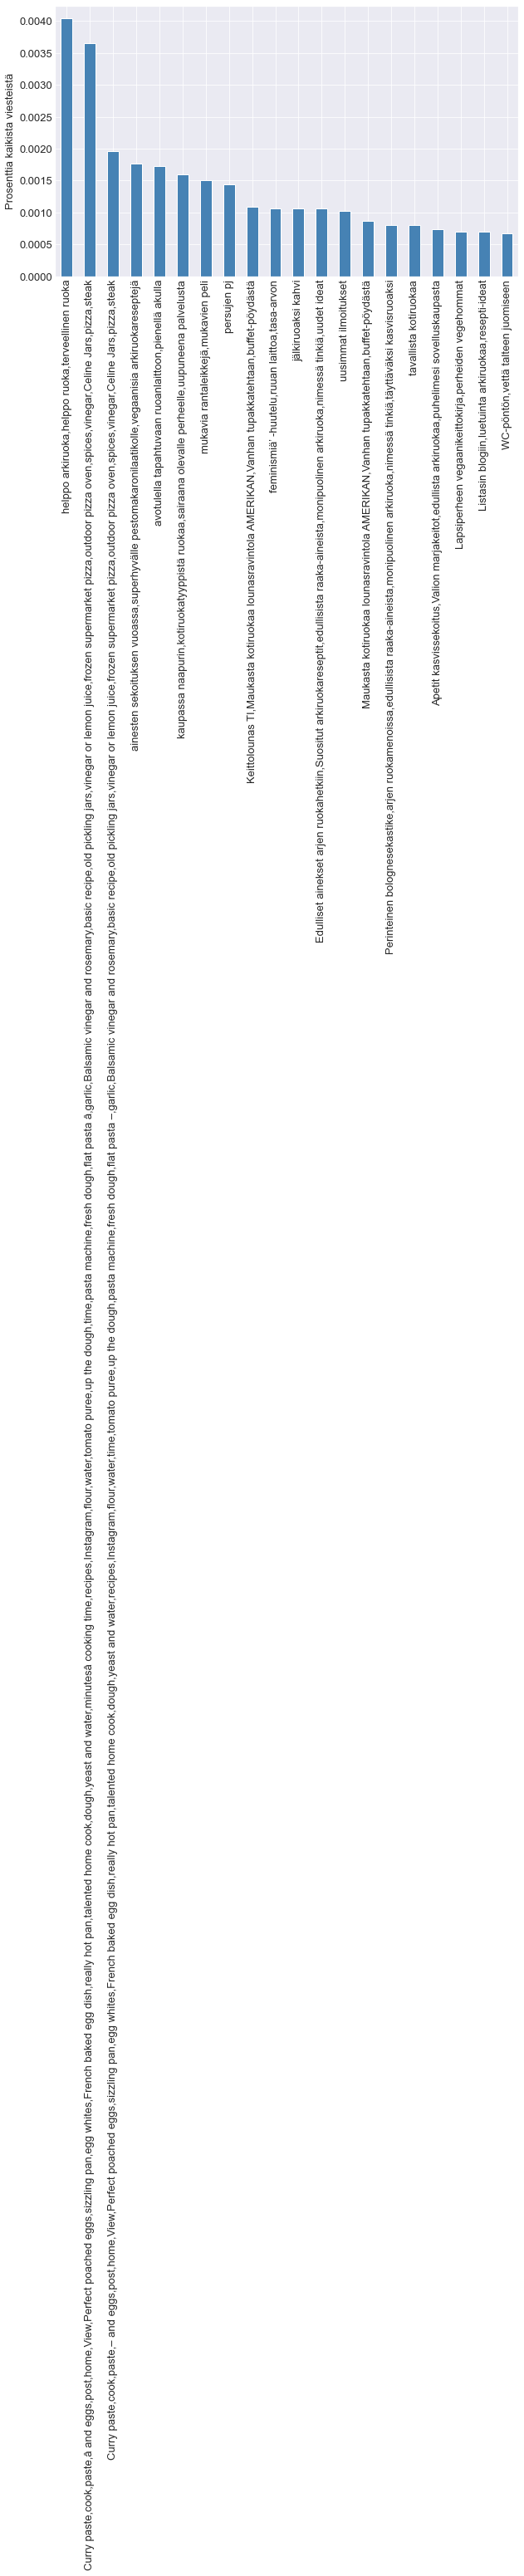

In [16]:
# plottaa histogrammit substantiiveista keyphrases

sns.set_style("darkgrid")
x = df2.Key_Phrases.value_counts(1).head(20)
x.plot(kind='bar',figsize=(10,6),fontsize=13,color='steelblue')
plt.ylabel('Prosenttia kaikista viesteistä', fontsize=13)

Text(0, 0.5, 'Prosenttia kaikista viesteistä')

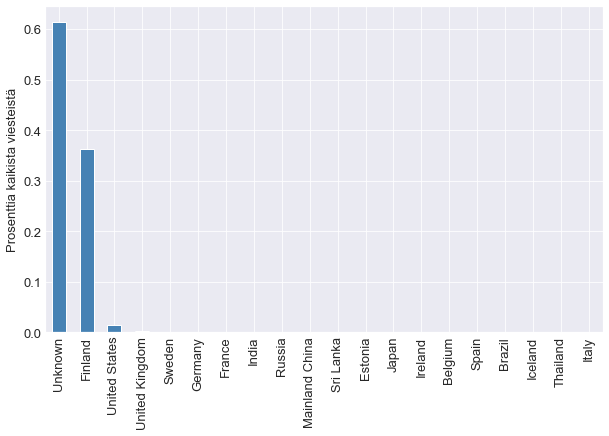

In [17]:
# plottaa histogrammin maista, joista lähetetty viesti

sns.set_style("darkgrid")
x = df.Country.value_counts(1).head(20)
x.plot(kind='bar',figsize=(10,6),fontsize=13,color='steelblue')
plt.ylabel('Prosenttia kaikista viesteistä', fontsize=13)

Text(0, 0.5, 'Prosenttia kaikista viesteistä')

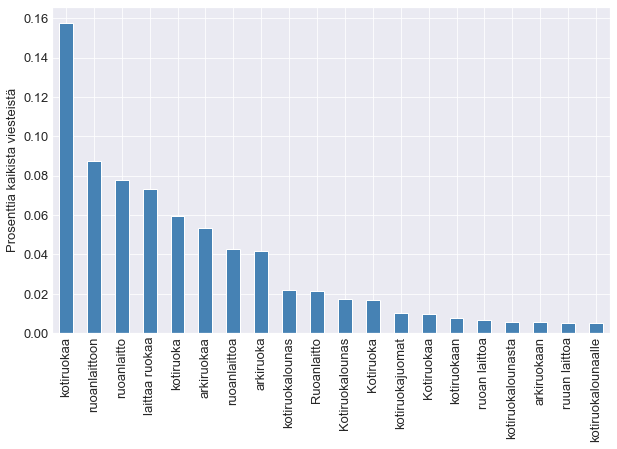

In [18]:
# plottaa histogrammin avainsanoista keywords

sns.set_style("darkgrid")
x = df.Keywords.value_counts(1).head(20)
x.plot(kind='bar',figsize=(10,6),fontsize=13,color='steelblue')
plt.ylabel('Prosenttia kaikista viesteistä', fontsize=13)

Text(0, 0.5, 'Prosenttia kaikista viesteistä')

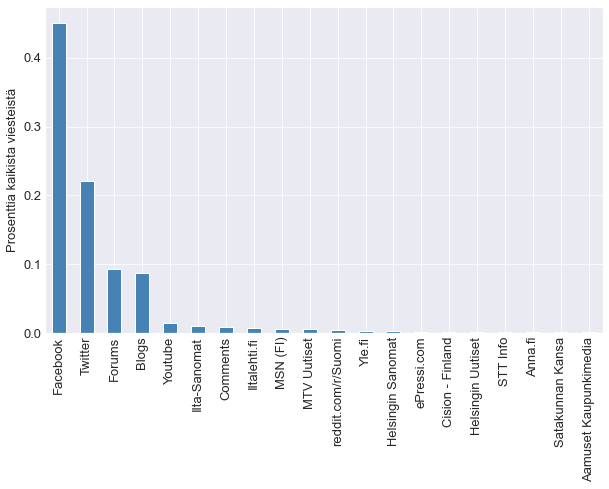

In [19]:
# plottaa histogrammin foorumeista, joista päivitetty viesti

sns.set_style("darkgrid")
x = df.Source.value_counts(1).head(20)
x.plot(kind='bar',figsize=(10,6),fontsize=13,color='steelblue')
plt.ylabel('Prosenttia kaikista viesteistä', fontsize=13)

Text(0, 0.5, 'Prosenttia kaikista viesteistä')

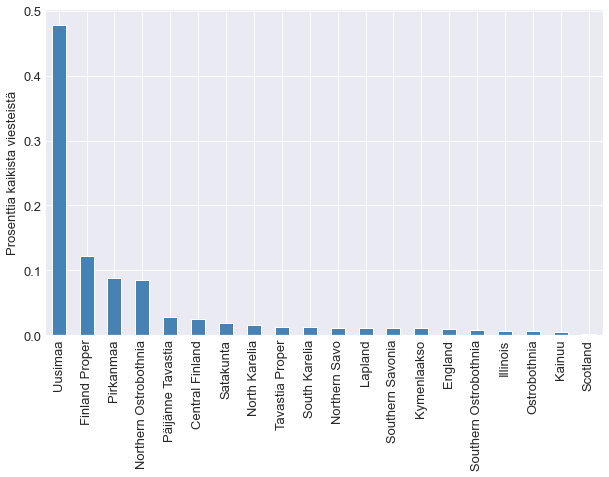

In [20]:
# plottaa histogrammin maakunnista

sns.set_style("darkgrid")
x = df.State.value_counts(1).head(20)
x.plot(kind='bar',figsize=(10,6),fontsize=13,color='steelblue')
plt.ylabel('Prosenttia kaikista viesteistä', fontsize=13)

Text(0, 0.5, 'Prosenttia kaikista viesteistä')

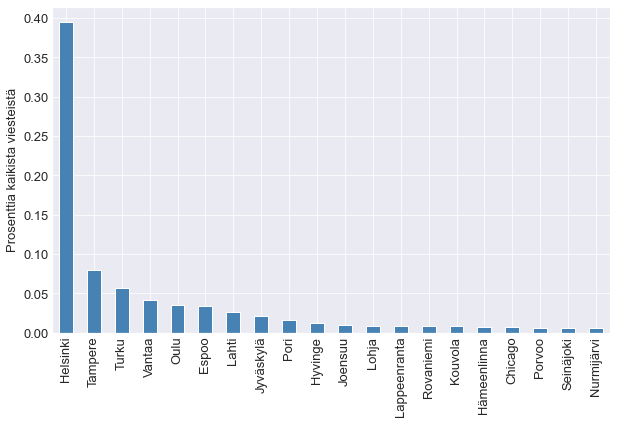

In [21]:
# plottaa histogrammin kaupungeista

sns.set_style("darkgrid")
x = df.City.value_counts(1).head(20)
x.plot(kind='bar',figsize=(10,6),fontsize=13,color='steelblue')
plt.ylabel('Prosenttia kaikista viesteistä', fontsize=13)